### Load image data

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os 
import cv2

from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras.callbacks import EarlyStopping


file path did not work
file path did not work
file path did not work


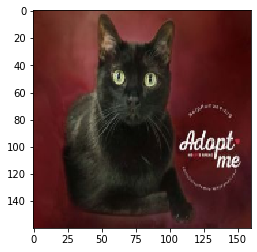

In [2]:
data = []
dirpath = "datasets/cat_imgs"
folders = ['tabby', 'siamese','bombay']
for folder in folders:
    path = os.path.join(dirpath, folder)
    for img_path in os.listdir(path):
        try: 
            image_arr = cv2.imread(os.path.join(path, img_path))
            img_rgb=cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB)
            new_array = cv2.resize(img_rgb,(160, 160))
            data.append([new_array, folders.index(folder)])
            plt.imshow(new_array)
        except:
            print("file path did not work")
        

In [3]:
# check how many images I have 
len(data)

796

In [4]:
pix =[]
X = []
y = []
for feature, label in data:
    X.append(feature)
    y.append(label)

In [5]:
np.array(X).shape

(796, 160, 160, 3)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [7]:
y_train = utils.to_categorical(y_train, 3)
y_test = utils.to_categorical(y_test, 3)

In [8]:
#Normalize the scale to 0-1
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')

X_train /= 255
X_test /= 255

In [9]:
y_train[0:5]

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

### Modeling

In [48]:
cnn_model = Sequential()

In [49]:
#first convolutional layer
cnn_model.add(Conv2D(filters=64,            
                     kernel_size=(3, 3),        
                     activation='relu',      
                     input_shape=(160, 160, 3)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

#second convolutional layer
cnn_model.add(Conv2D(filters=128,            
                     kernel_size=(3, 3),        
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

#second convolutional layer
cnn_model.add(Conv2D(filters=128,            
                     kernel_size=(3, 3),        
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

#third convolutional layer
cnn_model.add(Conv2D(filters=512,            
                     kernel_size=(3, 3),        
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

#third convolutional layer
cnn_model.add(Conv2D(filters=512,            
                     kernel_size=(3, 3),        
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))


#flatten the metrics to fit into the Dense layers 
cnn_model.add(Flatten())

In [50]:
cnn_model.add(Dense(2048, activation = 'relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(1024, activation = 'relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(1024, activation = 'relu'))
cnn_model.add(Dense(512, activation = 'relu'))
cnn_model.add(Dense(512, activation = 'relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(256, activation = 'relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dropout(0.3))



# The final layer
cnn_model.add(Dense(3, activation = 'softmax'))

In [51]:
# Compile model
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [52]:
# Fit model on training data
history = cnn_model.fit(X_train,
                          y_train,
                          batch_size=128,
                          validation_data=(X_test, y_test),
                          epochs=32)

Epoch 1/32
5/5 [==============================] - 11s 2s/step - loss: 1.1011 - accuracy: 0.3719 - val_loss: 1.0560 - val_accuracy: 0.4322
Epoch 2/32
5/5 [==============================] - 11s 2s/step - loss: 1.0049 - accuracy: 0.4154 - val_loss: 0.9459 - val_accuracy: 0.4322
Epoch 3/32
5/5 [==============================] - 11s 2s/step - loss: 0.9257 - accuracy: 0.4372 - val_loss: 0.7723 - val_accuracy: 0.6432
Epoch 4/32
5/5 [==============================] - 11s 2s/step - loss: 0.8151 - accuracy: 0.6734 - val_loss: 0.7948 - val_accuracy: 0.6382
Epoch 5/32
5/5 [==============================] - 11s 2s/step - loss: 0.7908 - accuracy: 0.6817 - val_loss: 0.7344 - val_accuracy: 0.6834
Epoch 6/32
5/5 [==============================] - 11s 2s/step - loss: 0.7146 - accuracy: 0.7035 - val_loss: 0.7171 - val_accuracy: 0.6884
Epoch 7/32
5/5 [==============================] - 11s 2s/step - loss: 0.6640 - accuracy: 0.7119 - val_loss: 0.6269 - val_accuracy: 0.7085
Epoch 8/32
5/5 [==================

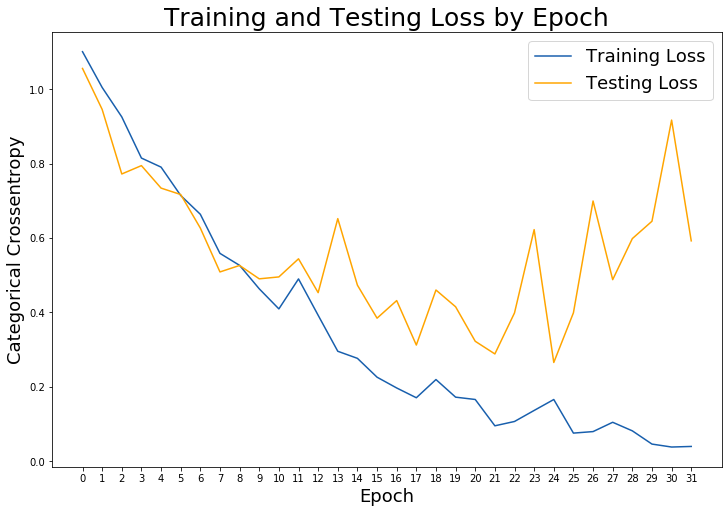

In [56]:

# Check out our train loss and test loss over epochs.
train_loss = history.history['loss']
test_loss = history.history['val_loss']
epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Categorical Crossentropy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

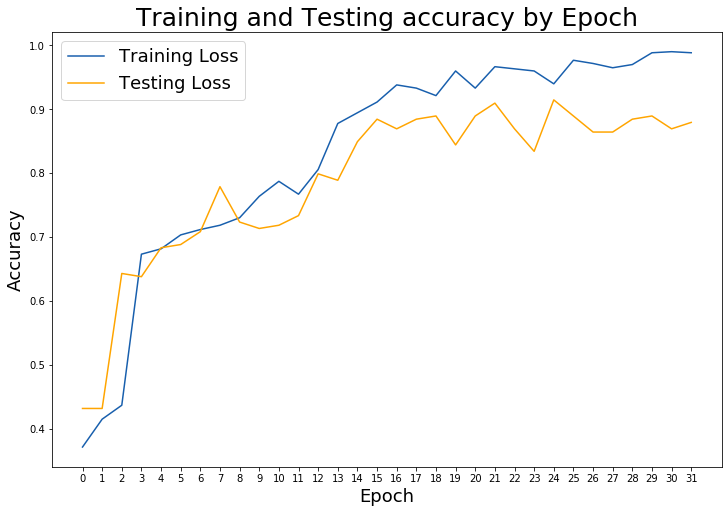

In [57]:
# Check out our train loss and test loss over epochs.
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']
epoch_labels = history.epoch

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='#185fad')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing accuracy by Epoch', fontsize=25)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.xticks(epoch_labels, epoch_labels)    # ticks, labels

plt.legend(fontsize=18);

In [58]:
cnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 158, 158, 64)      1792      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 79, 79, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 77, 77, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 38, 38, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 36, 36, 128)       147584    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 16, 16, 512)      

In [55]:
cnn_model.save('cnn_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cnn_model/assets
